In [1]:
from data_processing import *
from train_touch import *
from train_trace import *
from visualization import plot_segment

In [2]:
#data = Dataset("set1_imu.csv", "set1_tab.csv")
#data.data_set.to_csv('data/data_frame.csv')  
#data.data_set.head()

#data.data_set.columns

#plot_segment(data.data_set, 3)

In [2]:
data = pd.read_csv(".\data\data_frame.csv")
data[['x','y','z']].head()

,x,y,z
0,-125.0,727.0,0.0
1,-125.0,727.0,0.0
2,-125.0,727.0,0.0
3,-125.0,727.0,0.0
4,-125.0,727.0,0.0


Split into test and trainings data...
Extract segments and labels...
(41, 38000)
(41, 7125)
[[[-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]
  [-125. -125. -125.]]]
Extract segments and labels...
(12, 38000)
(12, 7125)
[[[351. 352. 354.]
  [354. 354. 354.]
  [354. 354. 354.]
  [354. 354. 353.]
  [353. 352. 352.]
  [352. 353. 355.]
  [358. 360. 365.]
  [368. 370. 372.]
  [373. 373. 374.]
  [375. 376. 378.]]]
Create the LSTM model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 2375, 16)          0         
                                                                 
 lstm (LSTM)                 (None, 2375, 3)           240       
                                                                 

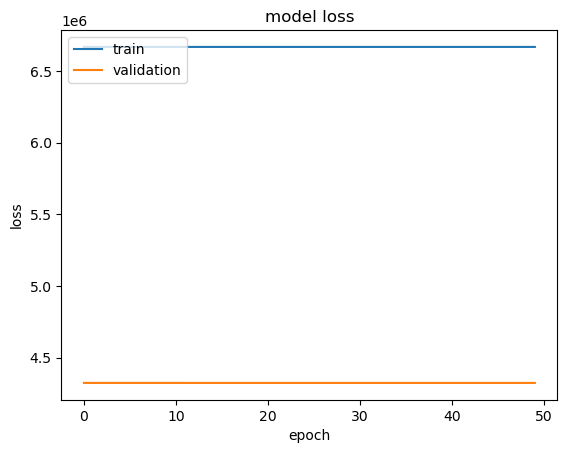

Use  model on test data...
1/1 [==============================] - 1s 1s/step


ValueError: Found array with dim 3. None expected <= 2.

In [3]:
model = PredictionModelTrace(data, True)

In [40]:
import tensorflow as tf

segments = []
labels = []
split_indices, = np.where(data["reset"] == 1)
# add beginning and end to the split indices
split_indices = np.insert(split_indices, 0, 0)
split_indices = np.append(split_indices, len(data)-1)

l = max(np.diff(split_indices))

dataframe = data
for i in range(0,len(split_indices)-1):
    vel_x = dataframe['vel_x'].values[split_indices[i]: split_indices[i+1]]
    vel_y = dataframe['vel_y'].values[split_indices[i]: split_indices[i+1]]
    vel_z = dataframe['vel_z'].values[split_indices[i]: split_indices[i+1]]
    nav_x = dataframe['nav_ax'].values[split_indices[i]: split_indices[i+1]]
    nav_y = dataframe['nav_ay'].values[split_indices[i]: split_indices[i+1]]
    nav_z = dataframe['nav_az'].values[split_indices[i]: split_indices[i+1]]
    ax = dataframe['ax'].values[split_indices[i]: split_indices[i+1]]
    ay = dataframe['ay'].values[split_indices[i]: split_indices[i+1]]
    az = dataframe['az'].values[split_indices[i]: split_indices[i+1]]
    gx = dataframe['gx'].values[split_indices[i]: split_indices[i+1]]
    gy = dataframe['gy'].values[split_indices[i]: split_indices[i+1]]
    gz = dataframe['gz'].values[split_indices[i]: split_indices[i+1]]
    q0 = dataframe['q0'].values[split_indices[i]: split_indices[i+1]]
    q1 = dataframe['q1'].values[split_indices[i]: split_indices[i+1]]
    q2 = dataframe['q2'].values[split_indices[i]: split_indices[i+1]]
    q3 = dataframe['q3'].values[split_indices[i]: split_indices[i+1]]

    x = dataframe['x'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)
    y = dataframe['y'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)
    z = dataframe['z'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)

    features = np.transpose(np.hstack((vel_x, vel_y, vel_z, nav_x, nav_y, nav_z, ax, ay, az, gx, gy, gz, q0, q1, q2, q3))).flatten()
    
    positions = np.hstack((x,y,z))
    if i == 0:
        print(positions)
    positions = positions.flatten()
    if i == 0:
        print(positions)

    segments.append(features)
    labels.append(positions)

segments = tf.keras.preprocessing.sequence.pad_sequences(segments, padding="post", value = -1000, maxlen=l*16)
labels = tf.keras.preprocessing.sequence.pad_sequences(labels, padding="post", value = -1000, maxlen= l*3)

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(len(split_indices)-1,-1, 16)
reshaped_labels = np.asarray(labels, dtype= np.float32).reshape(len(split_indices)-1,-1, 3)

print(reshaped_labels.shape)
print(reshaped_segments.shape)


[[ -125.           727.             0.        ]
 [ -125.           727.             0.        ]
 [ -125.           727.             0.        ]
 ...
 [  165.10208286   131.09215235 22709.28755394]
 [  165.10208286   131.29098308 21275.94664018]
 [  165.10208286   131.40510018 20991.        ]]
[ -125.           727.             0.         ...   165.10208286
   131.40510018 20991.        ]
(52, 2375, 3)
(52, 2375, 16)


In [ ]:
segment_3 = get_ith_segment(data.data_set, 3)

Split into test and trainings data...
Create segments and labels...
Create segments and labels...
The trainings data is of shape (337, 80) and (337, 3) and the test data is of shape (84, 80) and (84, 3)
Create the LSTM model...


c:\Users\ann-k\Documents\uni\epfl\tracePrediction\tracePrediction\train_trace.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = pd.DataFrame(scaler.fit_transform(df[features].values), index=df.index)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 5, 16)             0         
                                                                 
 lstm (LSTM)                 (None, 5, 128)            74240     
                                                                 
 lstm_1 (LSTM)               (None, 5, 10)             5560      
                                                                 
 lstm_2 (LSTM)               (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3)                 0         
                                                                 
Total params: 151,355
Trainable params: 151,355
Non-trai

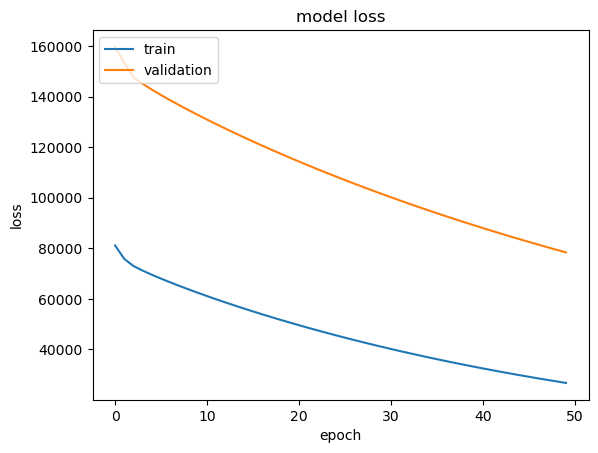

Use  model on test data...
3/3 [==============================] - 1s 6ms/step
The loss on the test data is 43791408.0
First predictions for x:  [177.8828  177.88252 177.88863 177.89595 177.89928]
First predictions for y:  [149.88055 149.88031 149.88544 149.89163 149.89447]


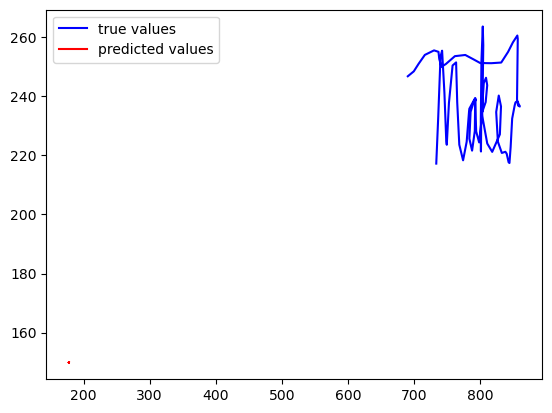

ValueError: x and y must have same first dimension, but have shapes (83,) and (84,)

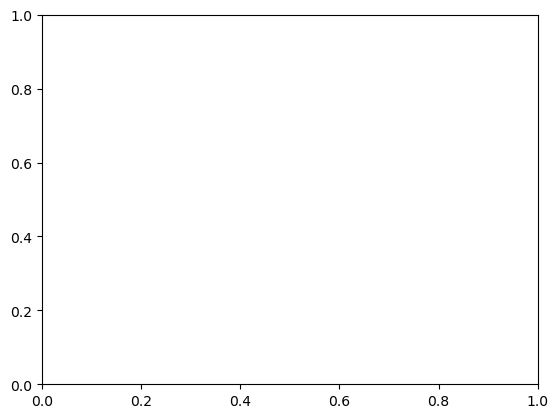

In [6]:
model = PredictionModelTrace(segment_3)

In [ ]:
#model = PredictionModel(data.data_set)